<h1>Analisis de la situación de vuelos en EE.UU correspondiente al mes de Agosto de 2017.</h1>
<ul>Herramientas utilizadas:
    <li>PySpark</li>
    <li>Pandas</li>
    <li>MATPLOTLIB & SEABORN</li>
</ul>

In [1]:
import pyspark 
from pyspark import SparkContext
from pyspark.sql import SQLContext
import seaborn as sns

In [2]:
#Incorporamos context de spark y SQL
sc = SparkContext.getOrCreate() 
sqlcontext = SQLContext(sc)

In [3]:
bd = sqlcontext.read.format(
    "com.databricks.spark.csv"
).option("header", "true").load("C:/Users/tadeo/On_Time_On_Time_Performance_2017_8.csv", inferSchema=True)


In [4]:
bd.dtypes

[('Year', 'int'),
 ('Quarter', 'int'),
 ('Month', 'int'),
 ('DayofMonth', 'int'),
 ('DayOfWeek', 'int'),
 ('FlightDate', 'string'),
 ('UniqueCarrier', 'string'),
 ('AirlineID', 'int'),
 ('Carrier', 'string'),
 ('TailNum', 'string'),
 ('FlightNum', 'int'),
 ('OriginAirportID', 'int'),
 ('OriginAirportSeqID', 'int'),
 ('OriginCityMarketID', 'int'),
 ('Origin', 'string'),
 ('OriginCityName', 'string'),
 ('OriginState', 'string'),
 ('OriginStateFips', 'int'),
 ('OriginStateName', 'string'),
 ('OriginWac', 'int'),
 ('DestAirportID', 'int'),
 ('DestAirportSeqID', 'int'),
 ('DestCityMarketID', 'int'),
 ('Dest', 'string'),
 ('DestCityName', 'string'),
 ('DestState', 'string'),
 ('DestStateFips', 'int'),
 ('DestStateName', 'string'),
 ('DestWac', 'int'),
 ('CRSDepTime', 'int'),
 ('DepTime', 'int'),
 ('DepDelay', 'double'),
 ('DepDelayMinutes', 'double'),
 ('DepDel15', 'double'),
 ('DepartureDelayGroups', 'int'),
 ('DepTimeBlk', 'string'),
 ('TaxiOut', 'double'),
 ('WheelsOff', 'int'),
 ('Wheels

In [5]:
bd.columns

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'UniqueCarrier',
 'AirlineID',
 'Carrier',
 'TailNum',
 'FlightNum',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'FirstDepTime',
 'TotalAddGTime',
 

In [6]:
bd.describe().toPandas()

,summary,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,_c109
0,count,510451,510451,510451,510451,510451,510451,510451,510451,510451,...,0,0,0,0,0,0,0,0,0,0
1,mean,2017.0,3.0,8.0,15.851229598923306,3.8516331636141374,None,None,19902.084225518218,None,...,None,None,None,None,None,None,None,None,None,None
2,stddev,0.0,0.0,0.0,8.95675621964453,1.92951798215969,None,None,376.799247083084,None,...,None,None,None,None,None,None,None,None,None,None
3,min,2017,3,8,1,1,2017-08-01,AA,19393,AA,...,None,None,None,None,None,None,None,None,None,None
4,max,2017,3,8,31,7,2017-08-31,WN,21171,WN,...,None,None,None,None,None,None,None,None,None,None


In [7]:
bd_final = bd.select('Year','Month','DayofMonth','DayOfWeek','CRSDepTime',
'UniqueCarrier', 'TailNum', 'ArrDelay','DepDelay','Origin','Dest','Distance',
'Cancelled', 'Diverted', 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
'LateAircraftDelay')

In [39]:
#Vamos a renombrar columnas asi se hace más entendible
bd_final = (bd_final.withColumnRenamed('Year', 'Año')
            .withColumnRenamed('Month', 'Mes')
            .withColumnRenamed('CRSDepTime', 'Hora_salida')
            .withColumnRenamed('DayofMonth', 'Dia_mes')
            .withColumnRenamed('DayOfWeek', 'Dia_semana')
            .withColumnRenamed('UniqueCarrier', 'Codigo')
            .withColumnRenamed('TailNum', 'Id_avion')
            .withColumnRenamed('ArrDelay', 'Retraso_llegada')
            .withColumnRenamed('DepDelay', 'Retraso_salida')
            .withColumnRenamed('Origin', 'Origen')
            .withColumnRenamed('Dest', 'Destino')
            .withColumnRenamed('Distance', 'Distancia')
            .withColumnRenamed('Cancelled', 'Cancelado')
            .withColumnRenamed('Diverted', 'Vuelo_desviado')
            .withColumnRenamed('CarrierDelay', 'Retraso_operativo')
            .withColumnRenamed('WeatherDelay', 'Retraso_clima')
            .withColumnRenamed('NASDelay', 'Retraso_establecido_national_aviation')
            .withColumnRenamed('SecurityDelay', 'Retraso_causas_seguridad')
            .withColumnRenamed('LateAircraftDelay', 'Retraso_vuelo_previo'))
            
bd_final.show()

+----+---+-------+----------+-----------+------+--------+---------------+--------------+------+-------+---------+---------+--------------+-----------------+-------------+-------------------------------------+------------------------+--------------------+-----+
| Año|Mes|Dia_mes|Dia_semana|Hora_salida|Codigo|Id_avion|Retraso_llegada|Retraso_salida|Origen|Destino|Distancia|Cancelado|Vuelo_desviado|Retraso_operativo|Retraso_clima|Retraso_establecido_national_aviation|Retraso_causas_seguridad|Retraso_vuelo_previo|Tarde|
+----+---+-------+----------+-----------+------+--------+---------------+--------------+------+-------+---------+---------+--------------+-----------------+-------------+-------------------------------------+------------------------+--------------------+-----+
|2017|  8|     25|         5|       2318|    UA|  N66831|           -1.0|          -7.0|   SFO|    RDU|   2400.0|      0.0|           0.0|              0.0|          0.0|                                  0.0|         

In [14]:
bd_pandas = bd_final.toPandas()
bd_pandas

,Año,Mes,Dia_mes,Dia_semana,Hora_salida,Codigo,Id_avion,Retraso_llegada,Retraso_salida,Origen,Destino,Distancia,Cancelled,Vuelo_desviado,Retraso_operativo,Retraso_clima,Retraso_establecido_national_aviation,Retraso_causas_seguridad,Retraso_vuelo_previo
0,2017,8,25,5,2318,UA,N66831,-1.0,-7.0,SFO,RDU,2400.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2017,8,25,5,1235,UA,N76288,-3.0,-1.0,ORD,MSY,837.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2017,8,25,5,2110,UA,N17244,0.0,-1.0,ITO,LAX,2449.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2017,8,25,5,737,UA,N439UA,-22.0,-9.0,JAC,ORD,1162.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2017,8,25,5,618,UA,N72405,-21.0,-6.0,MCI,IAH,643.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510446,2017,8,25,5,610,UA,N813UA,6.0,-5.0,RDU,SFO,2400.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
510447,2017,8,25,5,720,UA,N466UA,-12.0,-4.0,MKE,ORD,67.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
510448,2017,8,25,5,1945,UA,N67846,-20.0,-4.0,DEN,SMF,909.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
510449,2017,8,25,5,1723,UA,N496UA,-8.0,-8.0,DSM,DEN,589.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [9]:
bd_final.count()

510451

In [15]:
#Gestionamos datos faltantes
bd_final.dropna().count()

104708

In [16]:
bd_final.groupBy('Origen').count().orderBy('count', ascending=False).show()

+------+-----+
|Origen|count|
+------+-----+
|   ATL|31899|
|   ORD|25757|
|   DEN|20891|
|   LAX|19399|
|   SFO|16641|
|   DFW|15977|
|   SEA|13578|
|   LAS|13367|
|   PHX|13040|
|   MSP|12808|
|   DTW|11443|
|   BOS|11327|
|   IAH|11131|
|   MCO|11130|
|   EWR|10629|
|   SLC|10194|
|   CLT| 9881|
|   BWI| 9057|
|   JFK| 8477|
|   LGA| 8219|
+------+-----+
only showing top 20 rows



In [17]:
bd_final.groupBy('Destino').count().orderBy('count', ascending=False).show()

+-------+-----+
|Destino|count|
+-------+-----+
|    ATL|31901|
|    ORD|25778|
|    DEN|20897|
|    LAX|19387|
|    SFO|16651|
|    DFW|15978|
|    SEA|13582|
|    LAS|13374|
|    PHX|13039|
|    MSP|12800|
|    DTW|11453|
|    BOS|11329|
|    MCO|11131|
|    IAH|11123|
|    EWR|10611|
|    SLC|10197|
|    CLT| 9882|
|    BWI| 9057|
|    JFK| 8479|
|    LGA| 8219|
+-------+-----+
only showing top 20 rows



In [18]:
bd_final.describe("Retraso_llegada").show()

+-------+-----------------+
|summary|  Retraso_llegada|
+-------+-----------------+
|  count|           498163|
|   mean|6.692594592532966|
| stddev|46.24629502022411|
|    min|            -69.0|
|    max|           1532.0|
+-------+-----------------+



In [19]:
bd_final.describe("Retraso_salida").show()

+-------+-----------------+
|summary|   Retraso_salida|
+-------+-----------------+
|  count|           499709|
|   mean|11.18067515293901|
| stddev|44.49093418136612|
|    min|            -51.0|
|    max|           1538.0|
+-------+-----------------+



In [20]:
bd_final.select('Destino', 'Retraso_llegada').groupby('Destino').mean().show()

+-------+--------------------+
|Destino|avg(Retraso_llegada)|
+-------+--------------------+
|    BGM|  11.232558139534884|
|    INL|  -7.403846153846154|
|    DLG| -3.0384615384615383|
|    PSE|   22.63888888888889|
|    MSY|   8.903723404255318|
|    PPG| -10.833333333333334|
|    GEG|   6.047413793103448|
|    SNA|  5.9447802197802195|
|    BUR|  12.399547511312218|
|    GTF| -3.0943396226415096|
|    GRB|   6.052369077306733|
|    IFP|  14.161290322580646|
|    IDA|   9.700404858299596|
|    GRR|   6.312180143295803|
|    JLN|  20.147540983606557|
|    EUG|  10.075949367088608|
|    PSG|  2.2459016393442623|
|    MYR|-0.42876712328767125|
|    GSO|   4.072549019607843|
|    PVD|   7.450084602368866|
+-------+--------------------+
only showing top 20 rows



In [21]:
bd_final.select('Destino', 'Retraso_salida').groupby('Destino').mean().show()

+-------+-------------------+
|Destino|avg(Retraso_salida)|
+-------+-------------------+
|    BGM|  15.89655172413793|
|    INL|  3.673076923076923|
|    DLG|-3.3846153846153846|
|    PSE| 25.405405405405407|
|    MSY|  11.91932059447983|
|    PPG|-2.6666666666666665|
|    GEG|  8.735344827586207|
|    SNA|  8.921030984370717|
|    BUR| 13.807223476297969|
|    GTF|  2.547169811320755|
|    GRB|   9.27363184079602|
|    IFP|  7.451612903225806|
|    IDA|  9.854251012145749|
|    GRR|  12.08085977482088|
|    JLN| 18.327868852459016|
|    EUG|  9.734848484848484|
|    PSG|-0.3870967741935484|
|    MYR|  2.102319236016371|
|    GSO|        9.701171875|
|    PVD| 13.806913996627319|
+-------+-------------------+
only showing top 20 rows



In [25]:
#Empezamos a generar consultas SQL
sqlcontext.registerDataFrameAsTable(bd_final, "flights")
sqlcontext.sql("select Origen, Destino, count(*) as Conteo_vuelos from flights group by Origen, Destino order by Conteo_vuelos desc").show()

+------+-------+-------------+
|Origen|Destino|Conteo_vuelos|
+------+-------+-------------+
|   SFO|    LAX|         1420|
|   LAX|    SFO|         1400|
|   LAX|    JFK|         1138|
|   JFK|    LAX|         1138|
|   LGA|    ORD|          994|
|   ORD|    LGA|          984|
|   LAX|    SEA|          965|
|   SEA|    LAX|          963|
|   LAS|    LAX|          961|
|   LAX|    LAS|          961|
|   SFO|    SEA|          954|
|   SEA|    SFO|          951|
|   OGG|    HNL|          852|
|   HNL|    OGG|          852|
|   DEN|    LAX|          837|
|   LAX|    DEN|          835|
|   LAX|    ORD|          826|
|   ORD|    LAX|          821|
|   ANC|    SEA|          796|
|   SEA|    ANC|          795|
+------+-------+-------------+
only showing top 20 rows



In [26]:
sqlcontext.sql("select Destino, avg(Retraso_llegada) as RetrasoLlegada, count(*) as Conteo_vuelos from flights group by Destino order by RetrasoLlegada desc").show()

+-------+------------------+-------------+
|Destino|    RetrasoLlegada|Conteo_vuelos|
+-------+------------------+-------------+
|    PIB| 59.19672131147541|           62|
|    UST|              56.0|            7|
|    MEI| 48.21739130434783|           93|
|    OTH|             39.45|           40|
|    ACV|38.655913978494624|           97|
|    LAR| 28.61111111111111|           54|
|    SWF|28.353448275862068|          120|
|    TOL|26.653846153846153|           27|
|    STS|26.506756756756758|          155|
|    BQK| 25.34246575342466|           73|
|    RDD| 24.46067415730337|           93|
|    MRY|23.354545454545455|          234|
|    PSE| 22.63888888888889|           76|
|    SBP|22.539622641509435|          274|
|    SFO|21.026007483285284|        16651|
|    ESC| 20.64814814814815|           54|
|    COU|20.393617021276597|           96|
|    JLN|20.147540983606557|           62|
|    SBA|19.876681614349774|          462|
|    HRL|19.857988165680474|          209|
+-------+--

In [27]:
sqlcontext.sql("select Origen, avg(Retraso_salida) as RetrasoSalida, count(*) as Conteo_vuelos from flights group by Origen order by RetrasoSalida desc").show()

+------+------------------+-------------+
|Origen|     RetrasoSalida|Conteo_vuelos|
+------+------------------+-------------+
|   UST| 77.42857142857143|            7|
|   RDD| 53.41573033707865|           93|
|   MEI| 47.95652173913044|           93|
|   PIB|45.016129032258064|           62|
|   OTH|             40.05|           40|
|   STS| 38.23489932885906|          155|
|   CIU|34.666666666666664|           58|
|   ACV| 33.07608695652174|           97|
|   SWF| 32.41025641025641|          120|
|   MVY|30.027027027027028|           74|
|   SBP| 28.18867924528302|          274|
|   BGR|26.287769784172664|          146|
|   WYS|25.966101694915253|           59|
|   ESC|25.944444444444443|           54|
|   FSM|             23.25|           60|
|   PAH|              23.0|           58|
|   ADK|22.333333333333332|            9|
|   MFR|21.910179640718564|          339|
|   RDM|             21.03|          406|
|   BQN|20.804469273743017|          180|
+------+------------------+-------

<h1>Empezamos con las consignas del T.P</h2>

In [28]:
#Elimina los vuelos desviados
bd_final.select('Vuelo_desviado').describe().show()


+-------+--------------------+
|summary|      Vuelo_desviado|
+-------+--------------------+
|  count|              510451|
|   mean|0.002519340739855...|
| stddev| 0.05012981732648422|
|    min|                 0.0|
|    max|                 1.0|
+-------+--------------------+



In [29]:
bd_final.select('Vuelo_desviado').distinct().show()

+--------------+
|Vuelo_desviado|
+--------------+
|           0.0|
|           1.0|
+--------------+



In [30]:
#Es una columna bool, 1 seria desviado, 0 seria no desviado por lo tanto,
bd_final = bd_final.filter(bd_final.Vuelo_desviado == 0)

In [31]:
#Los datos faltantes de las variables CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, y LateAircraftDelay deben ser imputados con el valor 0
bd_final = bd_final.na.fill({'Retraso_operativo':0, 'Retraso_clima':0,
                             'Retraso_establecido_national_aviation':0,
                             'Retraso_causas_seguridad':0,
                             'Retraso_vuelo_previo':0})

In [34]:
#Crear una variable llamada Tarde, que indicará si la hora de salida del vuelo corresponde a la tarde
bd_final.select('Hora_salida').distinct().show(50)

+-----------+
|Hora_salida|
+-----------+
|       1829|
|       2122|
|       1342|
|       1645|
|       1959|
|       1238|
|       2142|
|        833|
|        737|
|       1721|
|       2235|
|       1025|
|       1127|
|       1507|
|        858|
|        540|
|       1522|
|        623|
|       1650|
|       1303|
|       1618|
|       1903|
|       1339|
|       1139|
|       1352|
|       1322|
|       1143|
|        808|
|       2025|
|       2231|
|       2259|
|       1223|
|       2249|
|        804|
|       2156|
|       1157|
|       2247|
|       2027|
|       2035|
|       2238|
|       1718|
|        853|
|       1005|
|        918|
|       1016|
|       1808|
|       1133|
|       1533|
|        857|
|        613|
+-----------+
only showing top 50 rows



In [35]:
#Investigando, tarde en la jerga de aeropuertos viene a ser entre 1600 y 2100
bd_final = bd_final.withColumn('Tarde', (bd_final.Hora_salida<2100) & (bd_final.Hora_salida>=1600))

In [36]:
bd_final.show()

+----+---+-------+----------+-----------+------+--------+---------------+--------------+------+-------+---------+---------+--------------+-----------------+-------------+-------------------------------------+------------------------+--------------------+-----+
| Año|Mes|Dia_mes|Dia_semana|Hora_salida|Codigo|Id_avion|Retraso_llegada|Retraso_salida|Origen|Destino|Distancia|Cancelled|Vuelo_desviado|Retraso_operativo|Retraso_clima|Retraso_establecido_national_aviation|Retraso_causas_seguridad|Retraso_vuelo_previo|Tarde|
+----+---+-------+----------+-----------+------+--------+---------------+--------------+------+-------+---------+---------+--------------+-----------------+-------------+-------------------------------------+------------------------+--------------------+-----+
|2017|  8|     25|         5|       2318|    UA|  N66831|           -1.0|          -7.0|   SFO|    RDU|   2400.0|      0.0|           0.0|              0.0|          0.0|                                  0.0|         

In [47]:
#Crear un vector de features y renombrar la variable respuesta a label. El vector de features tendrá las columnas: DayofMonth, DayOfWeek, Tarde, Distance. La variable respuesta es Cancelled

'''En un modelo de regresion lineal, vector assembler es una herramienta de transformación que reune 
todas las caracteristicas de un vector a partir de columnas de doble tipo, si alguna de estas columnas 
contiene valores cadea debemos usar StringIndexer'''

from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

a1 = VectorAssembler(
 inputCols=['Dia_mes','Dia_semana', 'Tarde', 'Distancia'],
 outputCol='features')

bd_final2 = a1.transform(bd_final).select(col("Cancelado").cast('double').alias("label"), 'features')
bd_final2.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[25.0,5.0,0.0,240...|
|  0.0|[25.0,5.0,0.0,837.0]|
|  0.0|[25.0,5.0,0.0,244...|
|  0.0|[25.0,5.0,0.0,116...|
|  0.0|[25.0,5.0,0.0,643.0]|
|  0.0|[25.0,5.0,1.0,733.0]|
|  0.0|[25.0,5.0,1.0,117...|
|  0.0|[25.0,5.0,0.0,133...|
|  0.0|[25.0,5.0,1.0,937.0]|
|  0.0|[25.0,5.0,0.0,447.0]|
|  0.0|[25.0,5.0,1.0,414.0]|
|  0.0|[25.0,5.0,1.0,146...|
|  0.0|[25.0,5.0,0.0,258...|
|  0.0|[25.0,5.0,1.0,250...|
|  0.0|[25.0,5.0,1.0,305.0]|
|  0.0|[25.0,5.0,0.0,213...|
|  0.0|[25.0,5.0,0.0,236...|
|  0.0|[25.0,5.0,0.0,334.0]|
|  0.0|[25.0,5.0,1.0,925.0]|
|  0.0|[25.0,5.0,1.0,236...|
+-----+--------------------+
only showing top 20 rows



In [46]:
#Deberás llevar a cabo la partición de la base de datos en los conjuntos de Train y de Test, contemplando que un 70% de los casos sean de Train. Para este paso, la semilla de aleatorización a emplear será 123.

(bd_final2_train, bd_final2_test) = bd_final2.randomSplit([0.7, 0.3],seed=123)
print(bd_final2_train.count())
print(bd_final2_test.count())

356919
152246


In [48]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression()
model = lr.fit(bd_final2)
pred = model.transform(bd_final2)

In [49]:
print(model.intercept, model.coefficients)

0.009239168539620408 [0.0011397572084377967,-0.0004970819991704505,0.004900086257159045,-5.961542907610808e-06]


Modelo Predictivo:

__Cancelado = 0.009239 + 0.001139757xDiaMes + -0.0004970xDia_semana + 0.004900xTarde + -5.961542xDistancia__ 

In [50]:
pred = pred.withColumn('error_residual', pred.label-pred.prediction)
pred.show()

+-----+--------------------+--------------------+--------------------+
|label|            features|          prediction|      error_residual|
+-----+--------------------+--------------------+--------------------+
|  0.0|[25.0,5.0,0.0,240...|0.020939985776447137|-0.02093998577644...|
|  0.0|[25.0,5.0,0.0,837.0]| 0.03025787734104283|-0.03025787734104283|
|  0.0|[25.0,5.0,0.0,244...| 0.02064787017397421|-0.02064787017397421|
|  0.0|[25.0,5.0,0.0,116...|0.028320375896069318|-0.02832037589606...|
|  0.0|[25.0,5.0,0.0,643.0]| 0.03141441666511933|-0.03141441666511933|
|  0.0|[25.0,5.0,1.0,733.0]|  0.0357779640605934| -0.0357779640605934|
|  0.0|[25.0,5.0,1.0,117...| 0.03316084672415225|-0.03316084672415225|
|  0.0|[25.0,5.0,0.0,133...|0.027277105887237425|-0.02727710588723...|
|  0.0|[25.0,5.0,1.0,937.0]|0.034561809307440794|-0.03456180930744...|
|  0.0|[25.0,5.0,0.0,447.0]| 0.03258287907501104|-0.03258287907501104|
|  0.0|[25.0,5.0,1.0,414.0]|0.037679696248121244|-0.03767969624812...|
|  0.0

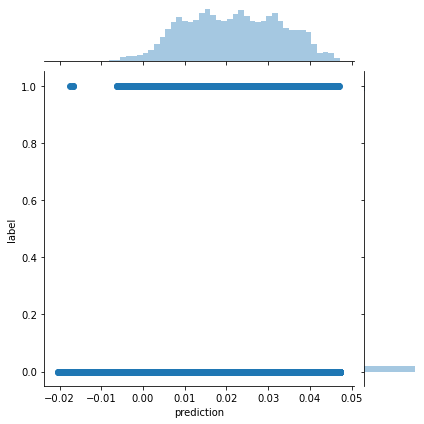

In [51]:
pandas_pred = pred.toPandas()
sns.jointplot(x="prediction", y="label", data=pandas_pred)

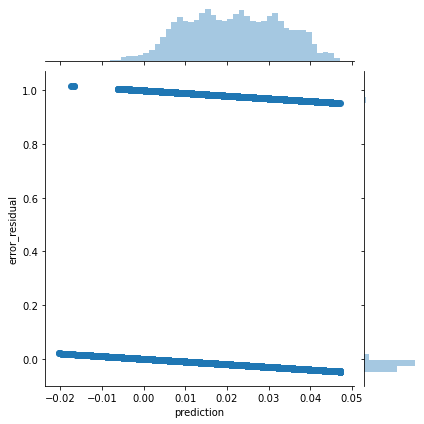

In [52]:
sns.jointplot(x="prediction", y="error_residual", data=pandas_pred)

In [54]:
from pyspark.ml.evaluation import RegressionEvaluator

print(RegressionEvaluator(metricName="rmse").evaluate(pred)) #error cuadratico
print(RegressionEvaluator(metricName="r2").evaluate(pred)) #coef. determinación multiple

0.1449649037436296
0.005969478510759019


In [ ]:
#Armar un modelo de regresion logistica